# Klasifikácia s využitím K najbližších susedov ( K - Nearest Neighbors, k-NN)

Máme súbor s klasifikovanými dátami. Nepoznáme význam jednotlivých stĺpcov, ale poznáme výsledok klasifikácie na ich základe, cieľovú triedu *target class*.
Použijeme KNN na vytvorenie modelu, ktorý je schopný predpovedať *target class* pre nové údaje na základe uvedených charakteristík, teda, či nová hodnota bude alebo nebude patriť do cieľovej triedy, bude mať danú vlastnosť.
KNN  sa používa na 
- klasifikáciu, ak je cieľová trieda diskrétna, nadobúda napríklad iba hodnoty 0,1.
- regresiu, ak cieľová trieda je spojitá. 

Tento algoritmus sa nesnaží naučiť funkcionálnu závislosť na základe trénovacích dát. Pamätá si vzor na základe práve spracovaného datasetu. KNN radíme k neparametrickým modelom, nekladie špecifické požiadavky na rozdelenie dát. Podrobnejšie informácie získame napríklad vo [wikipedii](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).
Používa sa v medicíne na určenie, či sa jedná o malígny alebo benígny karcinóm, rozpoznávanie vzorov, v odporúčacích systémoch, génovej expresii, počítačovom videní.



## Kroky

* Zvolíme vhodnú veľkos $k$
* Vyberieme vhodnú metriku pre výpočet vzdialeností
* Nájdeme k najbližších susedov v skúmanej vzorke dát
* Priradíme výslednú klasifikačnú triedu na základe prevahy klasifikačných tried susedov

## Nevýhody

* Nevhodné pre spracovanie veľkých dát vzhľadom na časovú náročnosť výpočtu
* Veľký vplyv dimenzionality
* Overfitting

## Import knižníc



In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Získanie dát

Nastavíme prvý stĺpec ako index pomocou parametra index_col=0.

In [3]:
df = pd.read_csv("Classified Data",index_col=0)

FileNotFoundError: File b'Classified Data' does not exist

In [ ]:
df.head()

## Štandardizácia premenných

Keďže KNN klasifikátor predpovedá triedu na základe výpočtu vzdialenosti skúmanej hodnoty a daného počtu hodnôt (pozorovaní) v bezprostrednej blízkosti, musíme vziať do úvahy rôzne veľkosti jednotlivých atribútov. Platí totiž, že atribúty s väčšími hodnotami by mali väčší vplyv na vzdialenosť medzi jednotlivými pozorovaniami, a teda aj na samotný klasifikátor KNN ako premenné/atribúty s menšou škálou hodnôt. 

Použijeme knižnicu scikit-learn, https://scikit-learn.org/stable/modules/preprocessing.html

In [ ]:
from sklearn.preprocessing import StandardScaler

Štandardizácia údajov v dátovom súbore je bežnou požiadavkou pre mnohé metódy strojového učenia implementované v knižnici scikit-learn. Bez štandardizácie by sa mohli správať nesprávne v prípade, ak by rozloženie jednotlivých atribútov nebolo viac či menej podobné štandardnému normálnemu Gaussovmu rozdeleniu s nulovým priemerom a jednotkovou odchýľkou.

In [4]:
scaler = StandardScaler()

NameError: name 'StandardScaler' is not defined

Štandardizujeme trénovaciu množinu dát bez cieľovej triedy.

In [11]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

Vytvoríme premennú *scaled_features*, do ktorej uložíme výslednú štandardizovanú formu vstupných atribútov.

In [12]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

Vytvoríme nový dátový rámec *df_feat*, ktorý obsahuje štandardizované hodnoty všetkých atribútov okrem cieľového. Ten použijeme pri tvorbe trénovacej a testovacej množiny.

In [13]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

        PJF       HQE       NXJ  
0 -1.482368 -0.949719 -0.643314  
1 -0.202240 -1.828051  0.636759  
2  0.285707 -0.682494 -0.377850  
3  1.066491  1.241325 -1.026987  
4 -1.472352  1.040772  0.276510

## Vytvorenie trénovacej a testovacej množiny

Znova využijeme najčastejšie používanú knižnicu scikit-learn.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

## Použitie K-NN

Našim cieľom je vytvoriť model schopný predpokladať, či nová skúmaná hodnota bude patriť do klasifikačnej triedy alebo nebude. Pri výpočte najprv použijeme  k=1, teda najbližšieho suseda.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)

Natrénujeme model.

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Predikčnú schopnosť modelu otestujeme na trénovacích dátach. Výsledok uložíme do premennej *pred*, aby sme ich mohli porovnať s hodnotami testovacej skupiny a vypočítať priemernú chybu.

In [21]:
pred = knn.predict(X_test)

## Predpovede a evalvácia modelu

Použijeme sadu preddefinovaných metrík pre zhodnotenie presnosti, efektívnosti modelu.

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

Pripravíme confusion matrix, ktorá zobrazí počty správne a nesprávne predikovaných hodnôt.

In [23]:
print(confusion_matrix(y_test,pred))

[[139  24]
 [ 10 127]]


Na záver vytvoríme správu o klasifikácii, classification_report, ktorá zobrazuje základné charakteristiky modelu.

In [24]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.93      0.85      0.89       163
          1       0.84      0.93      0.88       137

avg / total       0.89      0.89      0.89       300



Vidíme, že náš model pri  k=1 dosiahol presnosť 90%, čo nie je zlé, ale je čo zlepšovať.

## Vhodný výber hodnoty K

Použijeme tzv. elbow method pre určenie vhodnej hodnoty parametra k. Vypočítame model pre rôzne k, k = 1 až k = 40, pričom si budeme všímať chybu modelu. 

In [1]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
error_rate

NameError: name 'KNeighborsClassifier' is not defined

Následne tieto chyby zobrazíme v grafe.

Text(0,0.5,'Error Rate')

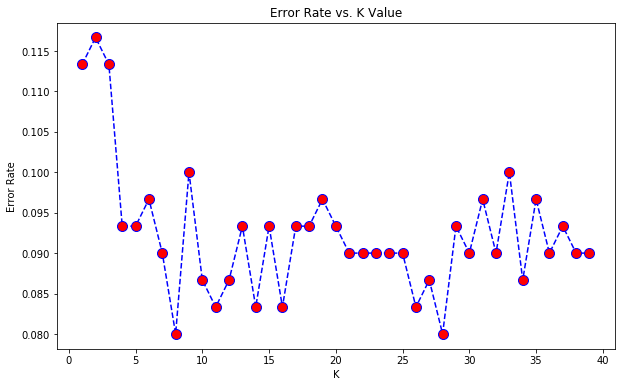

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Z grafu vidíme, že približne od *k*>23 sa chyba pobyhuje okolo 0.06-0.05. Skúsme preto natrénovať model s *k*=30 a porovnať výsledky s pomocou confusion matrix a classification report s prípadom, kedy *k* = 1.

In [27]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[139  24]
 [ 10 127]]


             precision    recall  f1-score   support

          0       0.93      0.85      0.89       163
          1       0.84      0.93      0.88       137

avg / total       0.89      0.89      0.89       300



In [28]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[141  22]
 [  5 132]]


             precision    recall  f1-score   support

          0       0.97      0.87      0.91       163
          1       0.86      0.96      0.91       137

avg / total       0.92      0.91      0.91       300



Vidíme, že sme dosiahli mierne zlepčenie presnosti modelu.